In [1]:
# Initial library declarations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from tabulate import tabulate

#display max columns and rows
pd.options.display.max_rows
pd.options.display.max_columns

#Set seed so that notebook runs the same with each run
np.random.seed(42)

# Store the product sales data into a pandas dataframe
df = pd.read_csv('/Users/dustin.ellis/Desktop/Desktop/Data Projects/Sales Product Data/archive/sales_data_file.csv')


## Data Information


Order ID - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.

Product - The product that have been sold.

Quantity Ordered - Ordered Quantity is the total item quantity ordered in the initial order (without any changes).
Price Each - The price of each products.

Order Date - This is the date the customer is requesting the order be shipped.

Purchase Address - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.

## Questions to answer regarding the dataset


### Target:

A target market analysis is an assessment of how your product or service fits into a specific market and where it will gain the most.

### Task:


Q: What was the best month for sales? How much was earned that month?

The best month for sales was December. December engrossed $4,613,443.34 with 24,984 orders placed. 

Q: What time of day are people placing the most orders? The least?

People seem to go shopping most at 7:00 pm. This is likely due to people finishing dinner at home, or waiting for dinner, so they go online and peruse. 3:00 am is when people are not shopping much.

Q: What city had the highest number of sales?

San Francisco, CA, USA

Q: What products are most often sold together?

iPhone and the lightning charging cable, the Google Phone and USB charger, & the iPhone and Wired headphones

Q: What product sold the most? Why do you think it sold the most?

AAA batteries (4-pack), with 31,017 orders. Everyone needs batteries. 

### How Much Probability?

Q: What is the probability for future customers to purchase a USB-C Charging Cable?

12.25% of people will purchase a USB-C cable in the future. 


Q: What is the probability for future customers to purchase an iPhone?

3.83% of people will purchase an iPhone in the future. 


Q: What is the probability for future customers to purchase a Google Phone?

3.09% of people will purchase a Google Phone in the future.


Q: What is the probability for future customers to purchase Wired Headphones?

10.56% of people will purchase Wired Headphones in the future. 


## Data Wrangling and DataFrame Cleaning

In [2]:
#Preview the dataset
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [3]:
# Lowercase and remove white space for column names
df.columns = df.columns.str.lower().str.strip()

In [4]:
# check for null values
df.isna()

#drop null values
df.dropna()

,order id,product,quantity ordered,price each,order date,purchase address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [5]:
#get new shape of dataframe
df.shape

(186850, 6)

In [6]:
#drop all instances of null values
df.dropna(axis="index", how="all", inplace=True)

In [7]:
#check the shape 
df.shape

(186305, 6)

In [8]:
#describe the dataframe
df.describe()

,order id,product,quantity ordered,price each,order date,purchase address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [9]:
# get some information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity ordered  186305 non-null  object
 3   price each        186305 non-null  object
 4   order date        186305 non-null  object
 5   purchase address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [10]:
# Get the unique products in the 'product' column
unique_products = df['product'].unique()

# Iterate over the unique products
for index, product_name in enumerate(unique_products):
    print("Index:", index)
    print("Product Name:", product_name)
    print()

Index: 0
Product Name: Macbook Pro Laptop

Index: 1
Product Name: LG Washing Machine

Index: 2
Product Name: USB-C Charging Cable

Index: 3
Product Name: 27in FHD Monitor

Index: 4
Product Name: AA Batteries (4-pack)

Index: 5
Product Name: Bose SoundSport Headphones

Index: 6
Product Name: AAA Batteries (4-pack)

Index: 7
Product Name: ThinkPad Laptop

Index: 8
Product Name: Lightning Charging Cable

Index: 9
Product Name: Google Phone

Index: 10
Product Name: Wired Headphones

Index: 11
Product Name: Apple Airpods Headphones

Index: 12
Product Name: Vareebadd Phone

Index: 13
Product Name: iPhone

Index: 14
Product Name: 20in Monitor

Index: 15
Product Name: 34in Ultrawide Monitor

Index: 16
Product Name: Flatscreen TV

Index: 17
Product Name: 27in 4K Gaming Monitor

Index: 18
Product Name: Product

Index: 19
Product Name: LG Dryer



In [11]:
df.set_index('order id')

,product,quantity ordered,price each,order date,purchase address
order id,,,,,
295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...
222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"


In [12]:
# Convert non-date values to NaN
df['order date'] = pd.to_datetime(df['order date'], errors='coerce')

# Drop rows with NaN values in 'order date' column
df.dropna(subset=['order date'], inplace=True)

In [13]:
df.shape

(185950, 6)

In [14]:
#Reformatting the date column for further analysis
import calendar

#Convert the 'Order Date' column to a datetime data type
df['order date'] = pd.to_datetime(df['order date'])


#Extract the month from the 'Order Date' column
df['month'] = df['order date'].dt.month

# Extract the month from the 'date' column and map it to month names
df['month'] = df['order date'].dt.month.map(lambda x: calendar.month_name[x])


# Specify the order of months as a list
month_order = list(calendar.month_name)[1:]

# Convert 'month' column to categorical with specified order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)


In [15]:
#Create new Columns: Street, City, State

df['street'] = df['purchase address'].apply(lambda x: x.split(',')[0])
df['city'] = df['purchase address'].apply(lambda x: x.split(',')[1])
df['state'] = df['purchase address'].apply(lambda x: x.split(', ')[-1].split(' ')[0])
df['zip code'] = df['purchase address'].apply(lambda x: x.split(', ')[-1].split(' ')[1])

In [16]:
df.head()

,order id,product,quantity ordered,price each,order date,purchase address,month,street,city,state,zip code
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,136 Church St,New York City,NY,10001
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,562 2nd St,New York City,NY,10001
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,277 Main St,New York City,NY,10001
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,410 6th St,San Francisco,CA,94016
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,43 Hill St,Atlanta,GA,30301


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order id          185950 non-null  object        
 1   product           185950 non-null  object        
 2   quantity ordered  185950 non-null  object        
 3   price each        185950 non-null  object        
 4   order date        185950 non-null  datetime64[ns]
 5   purchase address  185950 non-null  object        
 6   month             185950 non-null  category      
 7   street            185950 non-null  object        
 8   city              185950 non-null  object        
 9   state             185950 non-null  object        
 10  zip code          185950 non-null  object        
dtypes: category(1), datetime64[ns](1), object(9)
memory usage: 15.8+ MB


In [18]:
# Convert quantity ordered columns from object to integer, and price each from object to float
df['quantity ordered'] = df['quantity ordered'].astype(int)
df['price each'] = df['price each'].astype(float)

In [19]:
#Getting the sales figures (Quantity ordered * Price)
df['sales'] = (df['quantity ordered'] * df['price each'])

In [20]:
df.head()

,order id,product,quantity ordered,price each,order date,purchase address,month,street,city,state,zip code,sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,136 Church St,New York City,NY,10001,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,562 2nd St,New York City,NY,10001,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,277 Main St,New York City,NY,10001,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,410 6th St,San Francisco,CA,94016,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,43 Hill St,Atlanta,GA,30301,11.95


## Analysis

#### Q: What was the best month for sales? How much was earned that month?

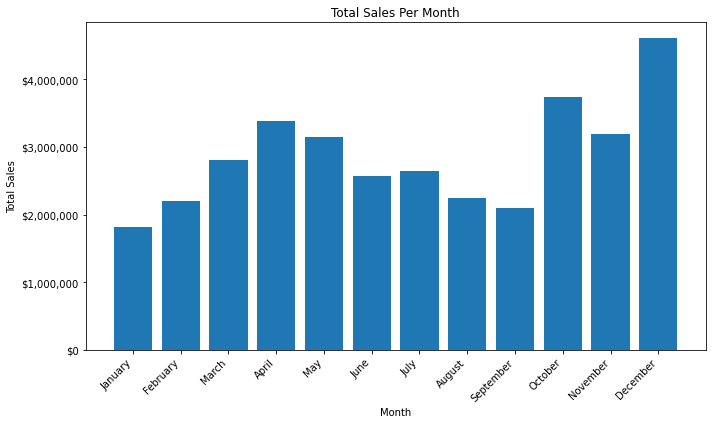

In [21]:
import matplotlib.ticker as ticker

#Plot the number of sales per month:

# Group the data by month and count the number of sales
sales_per_month = df.groupby('month')['sales'].sum()

# Plot the total number of sales per month as a bar graph with the correct order of months
plt.figure(figsize=(10, 6))
plt.bar(sales_per_month.index, sales_per_month.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Per Month')

# Format y-axis labels for large numbers
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# Group the data by month and calculate the total number of sales
sales_per_month = df.groupby('month')['sales'].sum()

# Create a DataFrame from the sales data
sales_table = pd.DataFrame({'Month': sales_per_month.index, 'Total Sales': sales_per_month.values})

# Format the 'Total Sales' column with commas for thousands separator and two decimal places
sales_table['Total Sales'] = sales_table['Total Sales'].apply(lambda x: '${:,.2f}'.format(x))

# Display the sales table
print(sales_table)

        Month    Total Sales
0     January  $1,822,256.73
1    February  $2,202,022.42
2       March  $2,807,100.38
3       April  $3,390,670.24
4         May  $3,152,606.75
5        June  $2,577,802.26
6        July  $2,647,775.76
7      August  $2,244,467.88
8   September  $2,097,560.13
9     October  $3,736,726.88
10   November  $3,199,603.20
11   December  $4,613,443.34


In [23]:
# get a table of the number of orders completed per month

# Convert 'Order Date' column to datetime if needed
df['order date'] = pd.to_datetime(df['order date'])

# Group by month and count the orders
orders_per_month = df.groupby(df['order date'].dt.to_period('M')).size().reset_index(name='Number of Orders')

# Create a list of lists representing the table data
table_data = []
for row in orders_per_month.itertuples(index=False):
    table_data.append(row)

# Define the table headers
headers = ["Month", "Number of Orders"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+---------+--------------------+
| Month   |   Number of Orders |
+=========+====================+
| 2019-01 |               9675 |
+---------+--------------------+
| 2019-02 |              11975 |
+---------+--------------------+
| 2019-03 |              15153 |
+---------+--------------------+
| 2019-04 |              18279 |
+---------+--------------------+
| 2019-05 |              16566 |
+---------+--------------------+
| 2019-06 |              13554 |
+---------+--------------------+
| 2019-07 |              14293 |
+---------+--------------------+
| 2019-08 |              11961 |
+---------+--------------------+
| 2019-09 |              11621 |
+---------+--------------------+
| 2019-10 |              20282 |
+---------+--------------------+
| 2019-11 |              17573 |
+---------+--------------------+
| 2019-12 |              24984 |
+---------+--------------------+
| 2020-01 |                 34 |
+---------+--------------------+


### Q: What time of day are people placing the most orders? The least?


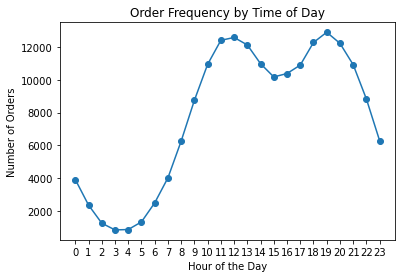

In [24]:
#Analyze the order frequency per time of day:

df['hour'] = df['order date'].dt.hour

orders_by_hour = df.groupby('hour')['order id'].count()

# Plot the order frequency per time of day
plt.plot(orders_by_hour.index, orders_by_hour.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Order Frequency by Time of Day')
plt.xticks(range(24))
plt.show()

In [25]:
#Get a table of the number of orders per hour 

df['hour'] = df['order date'].dt.hour

orders_by_hour = df.groupby('hour')['order id'].count().reset_index(name='Number of Orders')

# Create a list of lists representing the table data
table_data = []
for row in orders_by_hour.itertuples(index=False):
    table_data.append(row)

# Define the table headers
headers = ["Hour of the Day", "Number of Orders"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+-------------------+--------------------+
|   Hour of the Day |   Number of Orders |
+===================+====================+
|                 0 |               3910 |
+-------------------+--------------------+
|                 1 |               2350 |
+-------------------+--------------------+
|                 2 |               1243 |
+-------------------+--------------------+
|                 3 |                831 |
+-------------------+--------------------+
|                 4 |                854 |
+-------------------+--------------------+
|                 5 |               1321 |
+-------------------+--------------------+
|                 6 |               2482 |
+-------------------+--------------------+
|                 7 |               4011 |
+-------------------+--------------------+
|                 8 |               6256 |
+-------------------+--------------------+
|                 9 |               8748 |
+-------------------+--------------------+
|          

### Q: What city had the highest number of sales?


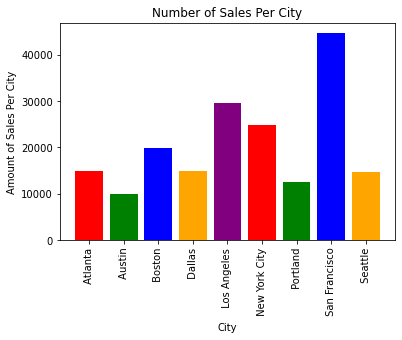

In [26]:
# Group the data by city and count the number of orders
sales_per_city = df.groupby('city')['sales'].count()

# Define a color scheme or a list of colors for each city
color_scheme = ['red', 'green', 'blue', 'orange', 'purple']  # Example color scheme

# Plot the number of orders completed per city as a bar graph with different colors
plt.bar(sales_per_city.index, sales_per_city.values, color=color_scheme)
plt.xlabel('City')
plt.ylabel('Amount of Sales Per City')
plt.title('Number of Sales Per City')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

### Q: What products are most often sold together?

In [35]:
from itertools import combinations
from collections import Counter

# Get all combinations of products in each order
order_combinations = []
for products in df.groupby('order id')['product']:
    order_combinations.extend(list(combinations(products[1], 2)))

# Count the frequency of each product combination
combination_counts = Counter(order_combinations)

# Get the most frequently sold product combinations
top_combinations = combination_counts.most_common()

# Print the top product combinations
for combination, count in top_combinations:
    print(combination, count)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


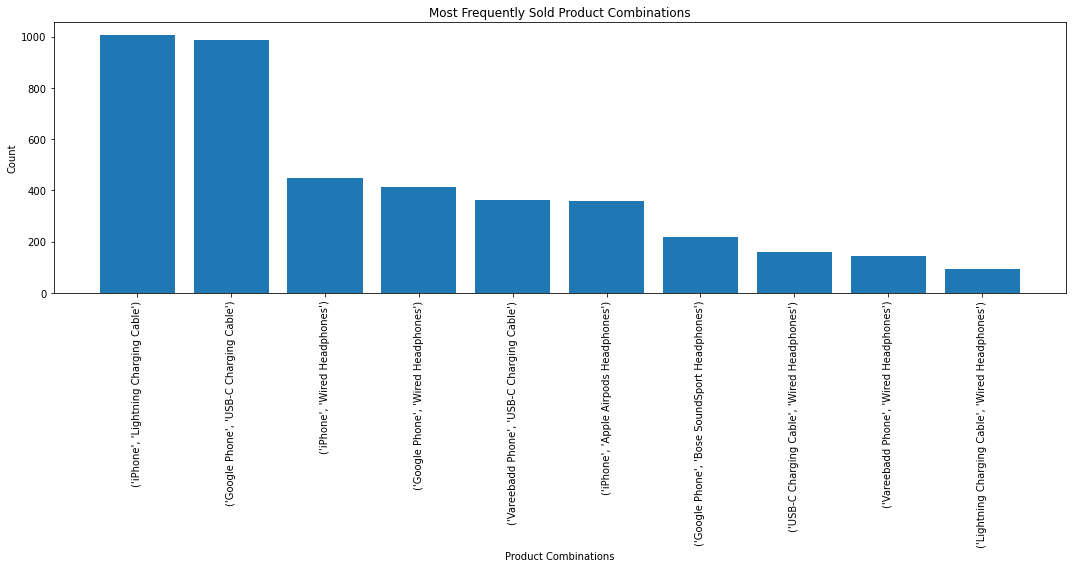

In [37]:
# Get the top product combinations and their counts
top_combinations = combination_counts.most_common(10)  # Adjust the number as per your preference

# Separate the combinations and counts
combinations, counts = zip(*top_combinations)

# Create a bar chart
plt.figure(figsize=(15, 8))
plt.bar(range(len(combinations)), counts)
plt.xlabel('Product Combinations')
plt.ylabel('Count')
plt.title('Most Frequently Sold Product Combinations')
plt.xticks(range(len(combinations)), combinations, rotation='vertical')
plt.tight_layout()
plt.show()

### Q: What product sold the most? Why do you think it sold the most?


In [39]:
# Group the data by product and sum the quantity ordered
product_sales = df.groupby('product')['quantity ordered'].sum()

# Find the product with the maximum quantity sold
product_sold_most = product_sales.idxmax()

# Get the corresponding quantity sold
quantity_sold_most = product_sales.loc[product_sold_most]

# Print the result
print("Product sold the most:", product_sold_most)
print("Quantity sold:", quantity_sold_most)

Product sold the most: AAA Batteries (4-pack)
Quantity sold: 31017


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


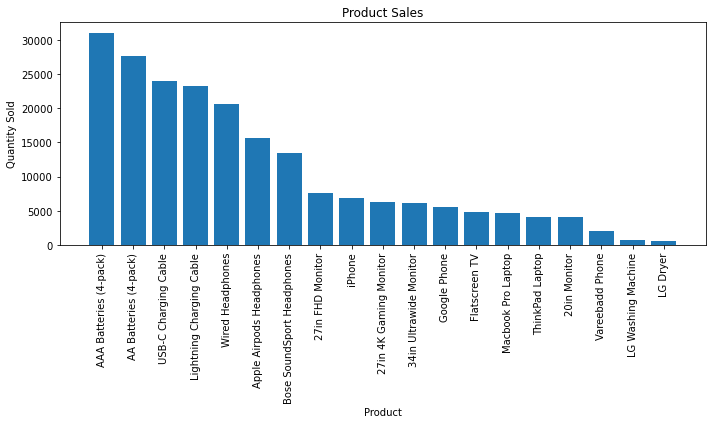

In [41]:
# Group the data by product and sum the quantity ordered
product_sales = df.groupby('product')['quantity ordered'].sum()

# Sort the products based on quantity sold in descending order
sorted_products = product_sales.sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_products.index, sorted_products.values)
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.title('Product Sales')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

### Q: How much probability for the next customers will have ordered USB-C Charging Cable?


In [43]:
# Calculate the total number of orders
total_orders = len(df['order id'].unique())

# Calculate the number of orders containing USB-C Charging Cable
usb_c_orders = df[df['product'] == 'USB-C Charging Cable']['order id'].nunique()

# Calculate the probability
probability = (usb_c_orders / total_orders) * 100

# Print the probability as a percentage
print("Probability of next customers having ordered a USB-C Charging Cable: {:.2f}%".format(probability))

Probability of next customers having ordered a USB-C Charging Cable: 12.25%


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Q: What is the probability for future customers to purchase an iPhone?

In [45]:
# Calculate the total number of orders
total_orders = len(df['order id'].unique())

# Calculate the number of orders containing USB-C Charging Cable
usb_c_orders = df[df['product'] == 'iPhone']['order id'].nunique()

# Calculate the probability
probability = (usb_c_orders / total_orders) * 100

# Print the probability as a percentage
print("Probability of next customers having ordered an iPhone: {:.2f}%".format(probability))

Probability of next customers having ordered an iPhone: 3.83%


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Q: What is the probability for future customers to purchase a Google Phone?


In [46]:
# Calculate the total number of orders
total_orders = len(df['order id'].unique())

# Calculate the number of orders containing USB-C Charging Cable
usb_c_orders = df[df['product'] == 'Google Phone']['order id'].nunique()

# Calculate the probability
probability = (usb_c_orders / total_orders) * 100

# Print the probability as a percentage
print("Probability of next customers having ordered a Google Phone: {:.2f}%".format(probability))

Probability of next customers having ordered a Google Phone: 3.09%


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Q: What is the probability for future customers to purchase Wired Headphones?

In [47]:
# Calculate the total number of orders
total_orders = len(df['order id'].unique())

# Calculate the number of orders containing USB-C Charging Cable
usb_c_orders = df[df['product'] == 'Wired Headphones']['order id'].nunique()

# Calculate the probability
probability = (usb_c_orders / total_orders) * 100

# Print the probability as a percentage
print("Probability of next customers having ordered Wired Headphones: {:.2f}%".format(probability))

Probability of next customers having ordered Wired Headphones: 10.56%


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
